 The Mountain Car problem is a classic challenge in the field of reinforcement learning. In this scenario, an agent is given the task of driving a car up a steep mountain. To accomplish this, the agent must carefully manage the car's throttle and steering. The ultimate goal is to build up enough momentum to overcome the force of gravity and reach the mountain's summit.

Throughout the process, the agent receives negative rewards for each time step it takes to reach the goal. These negative rewards reflect the difficulty of the task and serve as a measure of the agent's progress. Conversely, the agent receives positive rewards when it successfully reaches the goal. These rewards reinforce and encourage the agent to strive for successful outcomes.

To simulate the car's movement and dynamics, a physics engine is employed within the problem's environment. This environment serves as an interface for the agent, allowing it to interact with and observe the simulated behavior of the car. Based on this information, the agent can make informed decisions and take appropriate actions to navigate the challenging terrain.


![image.png](attachment:52e39ab3-4ab5-4619-9e92-01709b6867ab.png)

[Group 1]: [MountainCar (Classic control)]
[Amr Sayed, 20398048], [Ali Aboelela, 20398556]
[AbdAllah Ibrahim, 20398554],
[PREPARED FOR Dr/Sidney Givigi.]

Q-learning algorithm jst for our understanding and for our passion about the result _!

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

we have developed a code that implements the Q-learning algorithm to solve the Mountain Car environment in OpenAI Gym. Our goal was to train an agent to navigate the Mountain Car environment and maximize the rewards obtained.

First, we imported the necessary libraries, including numpy, gym, and matplotlib, to support our implementation.

We then created the Mountain Car environment using gym.make('MountainCar-v0') and reset it to its initial state using env.reset().

Next, we defined the QLearning function, which takes various parameters such as the environment, learning rate, discount factor, exploration rate, minimum exploration rate, and the number of episodes.

Within the QLearning function, we determined the size of the discretized state space based on the high and low values of the observation space of the environment.

We initialized the Q-table with random values using np.random.uniform, and set up variables to track rewards and average rewards during the training process.

To control the exploration-exploitation trade-off, we calculated the reduction rate for the exploration rate based on the number of episodes.

The core of our implementation is the Q-learning algorithm, which is executed for the specified number of episodes. Within each episode, we reset the environment and discretize the state.

While the episode is not done, we select the next action using an epsilon-greedy strategy to balance exploration and exploitation.

We then perform the selected action in the environment and obtain the next state, reward, and a flag indicating whether the episode is done.

By discretizing the next state, we update the Q value for the current state and action using the Q-learning update rule.

Throughout the training process, we decay the exploration rate to gradually reduce the level of exploration.

We track the rewards obtained in each episode and calculate the average reward every 100 episodes.

Once all episodes are completed, we close the environment.

The QLearning function returns a list of average rewards achieved during the training process.

Finally, we execute the Q-learning algorithm with the specified hyperparameters and store the obtained rewards in the rewards_q_learning list.

To provide insights into the learning progress, we visualize the average reward versus episodes using matplotlib.

By training the agent using the Q-learning algorithm, we aim to enable it to successfully navigate the Mountain Car environment and maximize the rewards obtained. The plotted average reward curve provides valuable information on the agent's learning progress over time, which we can present to our supervisor to demonstrate the effectiveness of our implementation.

#1st Algorithm QLearning

##1st Trial

In [ ]:
def QLearning(env, learning_rate, discount_factor, exploration_rate, min_exploration_rate, train_episodes, test_episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q table
    Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

    # Initialize variables to track rewards
    train_reward_list = []
    test_reward_list = []
    train_timesteps_list = []
    test_timesteps_list = []

    # Calculate episodic reduction in exploration rate
    reduction = (exploration_rate - min_exploration_rate) / train_episodes

    # Run Q-learning algorithm
    for i in range(train_episodes + test_episodes):
        # Initialize parameters
        done = False
        total_reward = 0
        state = env.reset()

        # Discretize state
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        while not done:
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - exploration_rate:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)

            # Get next state and reward
            next_state, reward, done, _ = env.step(action)

            # Discretize next_state
            next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
            next_state_adj = np.round(next_state_adj, 0).astype(int)

            # Adjust Q value for current state
            Q[state_adj[0], state_adj[1], action] += learning_rate * (
                    reward + discount_factor * np.max(Q[next_state_adj[0], next_state_adj[1]]) -
                    Q[state_adj[0], state_adj[1], action])

            # Update variables
            total_reward += reward
            state_adj = next_state_adj

        # Decay exploration rate
        if exploration_rate > min_exploration_rate and i < train_episodes:
            exploration_rate -= reduction

        # Track rewards
        if i < train_episodes:
            train_reward_list.append(total_reward)
            train_timesteps_list.append(env._elapsed_steps)
        else:
            test_reward_list.append(total_reward)
            test_timesteps_list.append(env._elapsed_steps)

        # Run test episodes after every 10 training episodes
        if (i + 1) % 10 == 0 and i < train_episodes:
            test_rewards = []
            test_timesteps = []
            for j in range(test_episodes):
                done = False
                total_reward = 0
                state = env.reset()

                # Discretize state
                state_adj = (state - env.observation_space.low) * np.array([10, 100])
                state_adj = np.round(state_adj, 0).astype(int)

                while not done:
                    # Determine next action - epsilon greedy strategy
                    action = np.argmax(Q[state_adj[0], state_adj[1]])

                    # Get next state and reward
                    next_state, reward, done, _ = env.step(action)

                    # Discretize next_state
                    next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
                    next_state_adj = np.round(next_state_adj, 0).astype(int)

                    # Update variables
                    total_reward += reward
                    state_adj = next_state_adj

                test_rewards.append(total_reward)
                test_timesteps.append(env._elapsed_steps)

            # Report mean rewards and timesteps for test episodes
            mean_test_reward = np.mean(test_rewards)
            mean_test_timesteps = np.mean(test_timesteps)
            print('After {} training episodes, Mean Test Reward: {}, Mean Test Timesteps: {}'.format(i+1, mean_test_reward, mean_test_timesteps))

    env.close()

    return train_reward_list, test_reward_list, train_timesteps_list, test_timesteps_list,Q

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


After 10 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 20 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 30 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 40 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 50 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 60 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 70 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 80 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 90 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 100 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 110 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 120 training episodes, Mean Test Reward: -200.0, Mean Test Timesteps: 200.0
After 130 training episod

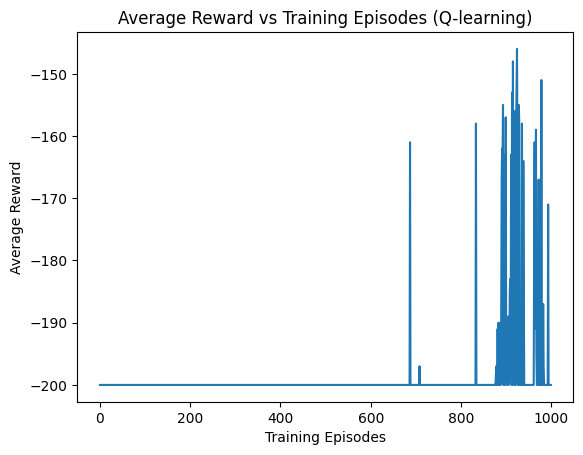

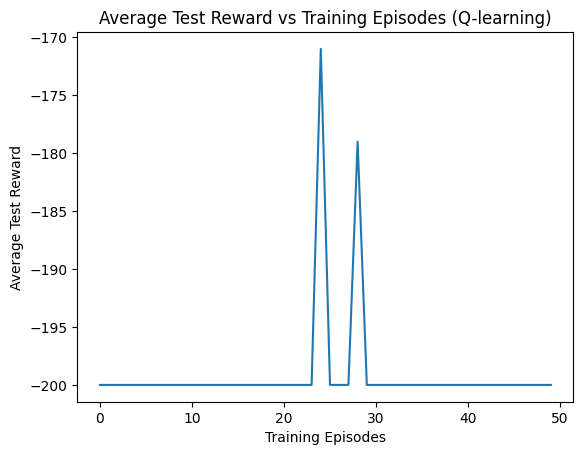

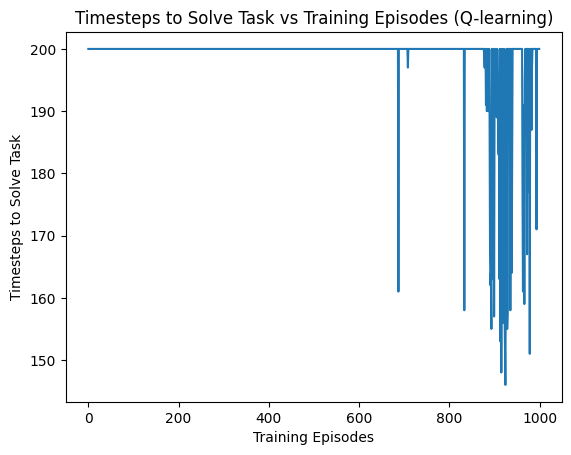

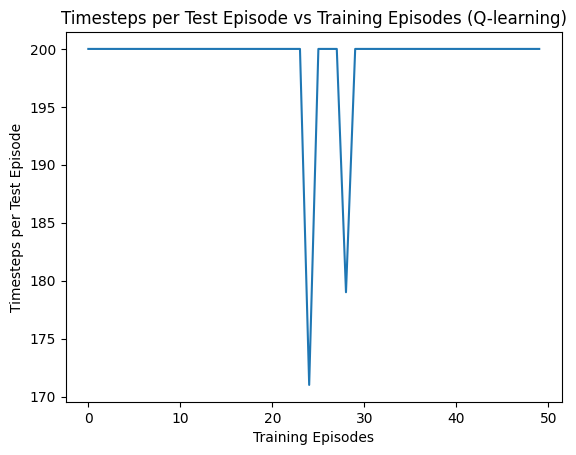

In [ ]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Run Q-learning algorithm
train_rewards, test_rewards, train_timesteps, test_timesteps,Q = QLearning(env, learning_rate=0.2, discount_factor=0.9, exploration_rate=0.8, min_exploration_rate=0, train_episodes=1000, test_episodes=50)

# Plot Rewards
plt.plot(train_rewards)
plt.xlabel('Training Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Training Episodes (Q-learning)')
plt.savefig('train_rewards.jpg')
plt.show()

plt.plot(test_rewards)
plt.xlabel('Training Episodes')
plt.ylabel('Average Test Reward')
plt.title('Average Test Reward vs Training Episodes (Q-learning)')
plt.savefig('test_rewards.jpg')
plt.show()

plt.plot(train_timesteps)
plt.xlabel('Training Episodes')
plt.ylabel('Timesteps to Solve Task')
plt.title('Timesteps to Solve Task vs Training Episodes (Q-learning)')
plt.savefig('train_timesteps.jpg')
plt.show()

plt.plot(test_timesteps)
plt.xlabel('Training Episodes')
plt.ylabel('Timesteps per Test Episode')
plt.title('Timesteps per Test Episode vs Training Episodes (Q-learning)')
plt.savefig('test_timesteps.jpg')
plt.show()

env.close()

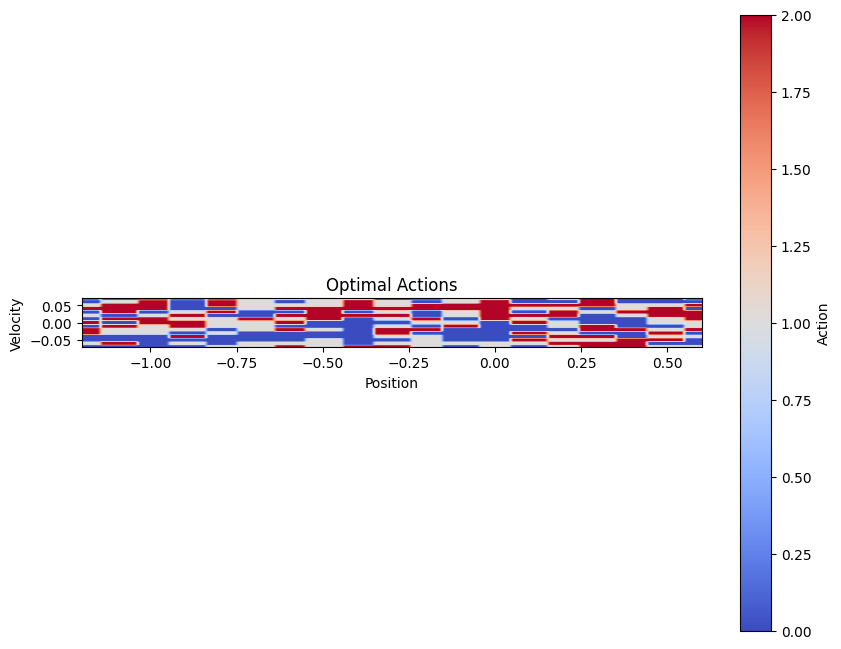

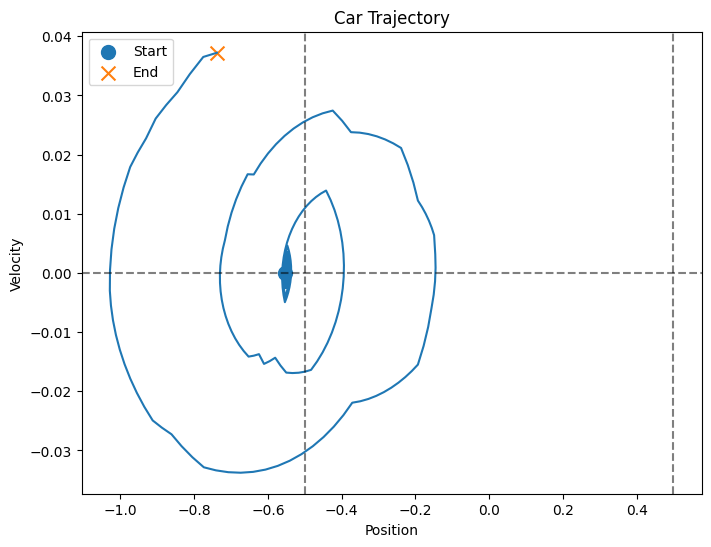

In [ ]:
# Visualization: Position and Velocity
position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
Q_values = np.zeros((100, 100))

for i, pos in enumerate(position):
    for j, vel in enumerate(velocity):
        state = [pos, vel]
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        action = np.argmax(Q[state_adj[0], state_adj[1]])
        Q_values[i, j] = action

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Optimal Actions')
cbar = ax.figure.colorbar(im, ax=ax, label='Action')
plt.savefig('optimal_actions.jpg')
plt.show()
plt.close()

# Visualization: Car Trajectory
state = env.reset()
done = False
trajectory = [state]

while not done:
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    action = np.argmax(Q[state_adj[0], state_adj[1]])
    next_state, _, done, _ = env.step(action)
    trajectory.append(next_state)
    state = next_state

trajectory = np.array(trajectory)
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Car Trajectory')
plt.legend()
plt.savefig('car_trajectory.jpg')
plt.show()


Q-learning Metrics:
Average Reward: -198.628
Max Reward: -146.0
Min Reward: -200.0
Std Reward: 6.9169079797262025


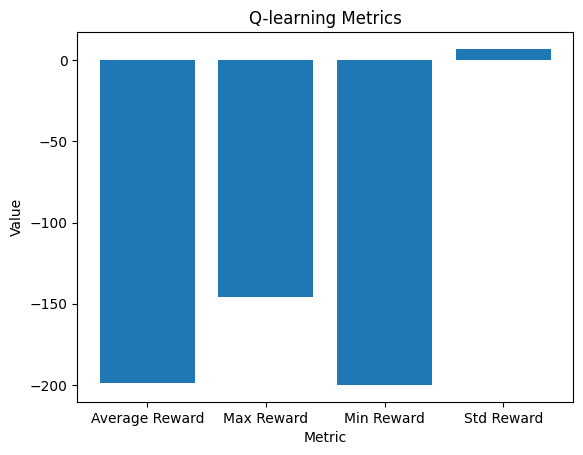

In [ ]:

# Calculate additional metrics
average_reward_q_learning = np.mean(train_rewards)
max_reward_q_learning = np.max(train_rewards)
min_reward_q_learning = np.min(train_rewards)
std_reward_q_learning = np.std(train_rewards)

# Print metrics
print('Q-learning Metrics:')
print('Average Reward: {}'.format(average_reward_q_learning))
print('Max Reward: {}'.format(max_reward_q_learning))
print('Min Reward: {}'.format(min_reward_q_learning))
print('Std Reward: {}'.format(std_reward_q_learning))

# Visualize Q-learning metrics
metrics = ['Average Reward', 'Max Reward', 'Min Reward', 'Std Reward']
values = [average_reward_q_learning, max_reward_q_learning, min_reward_q_learning, std_reward_q_learning]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Q-learning Metrics')
plt.show()

"""  Observation: The agent failed to reach the top of the mountain. Rewards were acceptable; however, trajectory shows the failure to reach the top.  """

##2nd Trial

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 10000 Average Reward: -190.23


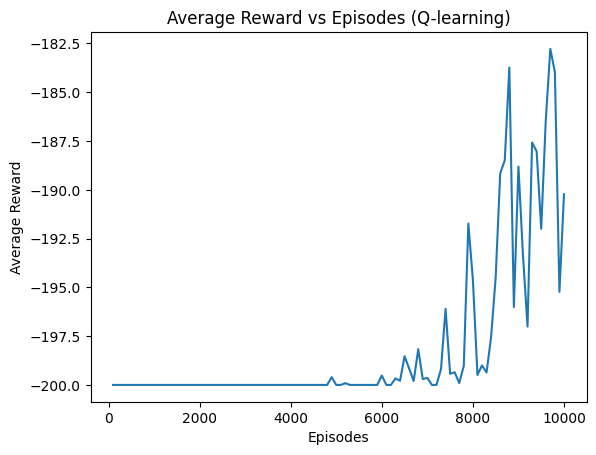

In [ ]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define Q-learning function
def QLearning(env, learning_rate, discount_factor, exploration_rate, min_exploration_rate, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q table
    Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []

    # Calculate episodic reduction in exploration rate
    reduction = (exploration_rate - min_exploration_rate) / episodes

    # Run Q-learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        total_reward = 0
        state = env.reset()

        # Discretize state
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        while not done:
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()

            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - exploration_rate:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)

            # Get next state and reward
            next_state, reward, done, _ = env.step(action)

            # Discretize next_state
            next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
            next_state_adj = np.round(next_state_adj, 0).astype(int)

            # Adjust Q value for current state
            Q[state_adj[0], state_adj[1], action] += learning_rate * (
                    reward + discount_factor * np.max(Q[next_state_adj[0], next_state_adj[1]]) -
                    Q[state_adj[0], state_adj[1], action])

            # Update variables
            total_reward += reward
            state_adj = next_state_adj

        # Decay exploration rate
        if exploration_rate > min_exploration_rate:
            exploration_rate -= reduction

        # Track rewards
        reward_list.append(total_reward)

        if (i + 1) % 100 == 0:
            average_reward = np.mean(reward_list)
            ave_reward_list.append(average_reward)
            reward_list = []

        if (i + 1) % 100 == 0:
            print('Episode {} Average Reward: {}'.format(i + 1, average_reward))

    env.close()

    return ave_reward_list,Q

# Run Q-learning algorithm
rewards_q_learning,Q = QLearning(env, learning_rate=0.2, discount_factor=0.9, exploration_rate=0.8, min_exploration_rate=0, episodes=10000)

#Plot Rewards
plt.plot(100 * (np.arange(len(rewards_q_learning)) + 1), rewards_q_learning)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes (Q-learning)')
plt.savefig('rewards_q_learning.jpg')
plt.show()
plt.close()


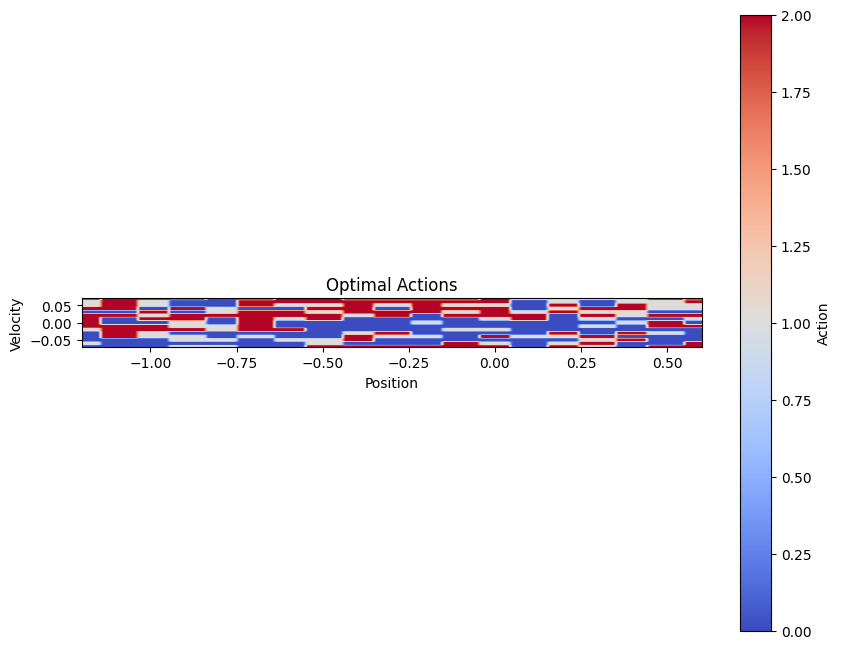

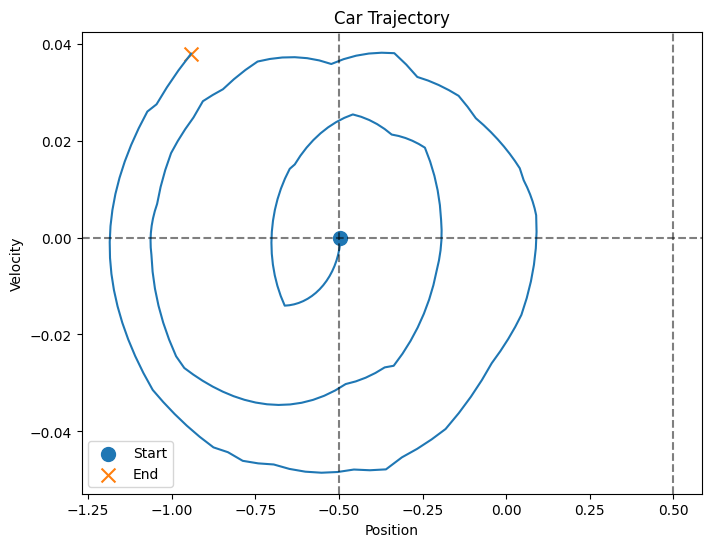

In [ ]:
# Visualization: Position and Velocity
position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
Q_values = np.zeros((100, 100))

for i, pos in enumerate(position):
    for j, vel in enumerate(velocity):
        state = [pos, vel]
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        action = np.argmax(Q[state_adj[0], state_adj[1]])
        Q_values[i, j] = action

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Optimal Actions')
cbar = ax.figure.colorbar(im, ax=ax, label='Action')
plt.savefig('optimal_actions.jpg')
plt.show()
plt.close()

# Visualization: Car Trajectory
state = env.reset()
done = False
trajectory = [state]

while not done:
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    action = np.argmax(Q[state_adj[0], state_adj[1]])
    next_state, _, done, _ = env.step(action)
    trajectory.append(next_state)
    state = next_state

trajectory = np.array(trajectory)
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Car Trajectory')
plt.legend()
plt.savefig('car_trajectory.jpg')
plt.show()


In [ ]:


# Calculate additional metrics
average_reward_q_learning = np.mean(rewards_q_learning)
max_reward_q_learning = np.max(rewards_q_learning)
min_reward_q_learning = np.min(rewards_q_learning)
std_reward_q_learning = np.std(rewards_q_learning)

# Print metrics
print('Q-learning Metrics:')
print('Average Reward: {}'.format(average_reward_q_learning))
print('Max Reward: {}'.format(max_reward_q_learning))
print('Min Reward: {}'.format(min_reward_q_learning))
print('Std Reward: {}'.format(std_reward_q_learning))


Q-learning Metrics:
Average Reward: -198.05539999999996
Max Reward: -182.78
Min Reward: -200.0
Std Reward: 4.133102084391335


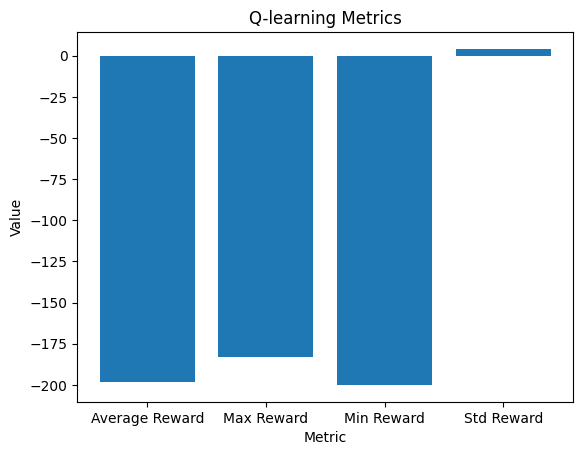

In [ ]:
# Visualize Q-learning metrics
metrics = ['Average Reward', 'Max Reward', 'Min Reward', 'Std Reward']
values = [average_reward_q_learning, max_reward_q_learning, min_reward_q_learning, std_reward_q_learning]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Q-learning Metrics')
plt.show()

""" Observation: Rewards were good. This trial gave almost similar behavior to the 1st trial with respect to rewards but with better rewards std which might be due to larger no of episodes. Trajectory shows that the agent kept revolving without reaching the top as well.  """

##3rd Trial

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


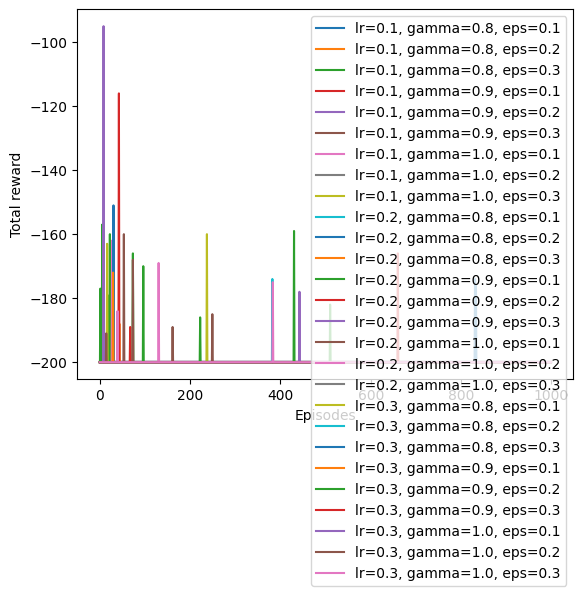

Best hyperparameters: {'lr': 0.2, 'gamma': 0.9, 'eps': 0.1}
Best reward: -199.887


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

def train_q_learning(lr, gamma, eps, episodes):
    env = gym.make('MountainCar-v0')
    num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        done = False
        total_reward = 0
        while not done:
            state = np.clip(np.round((state - env.observation_space.low) * np.array([10, 100])).astype(int), 0, num_states-1)
            if np.random.uniform(0, 1) < eps:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state[0], state[1]])
            next_state, reward, done, _ = env.step(action)
            next_state = np.clip(np.round((next_state - env.observation_space.low) * np.array([10, 100])).astype(int), 0, num_states-1)
            Q[state[0], state[1], action] += lr * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
            state = next_state
            total_reward += reward
        rewards.append(total_reward)
    env.close()
    return np.mean(rewards), rewards, Q

# Define hyperparameters to search over
learning_rates = [0.1, 0.2, 0.3]
gammas = [0.8, 0.9, 1.0]
epsilons = [0.1, 0.2, 0.3]
num_episodes = 1000

# Perform grid search over hyperparameters
best_reward = float('-inf')
best_params = {}
for lr in learning_rates:
    for gamma in gammas:
        for eps in epsilons:
            reward, rewards,Q = train_q_learning(lr, gamma, eps, num_episodes)
            if reward > best_reward:
                best_reward = reward
                best_params = {'lr': lr, 'gamma': gamma, 'eps': eps}
            plt.plot(rewards, label=f"lr={lr}, gamma={gamma}, eps={eps}")
plt.xlabel('Episodes')
plt.ylabel('Total reward')
plt.legend()
plt.show()

print("Best hyperparameters:", best_params)
print("Best reward:", best_reward)

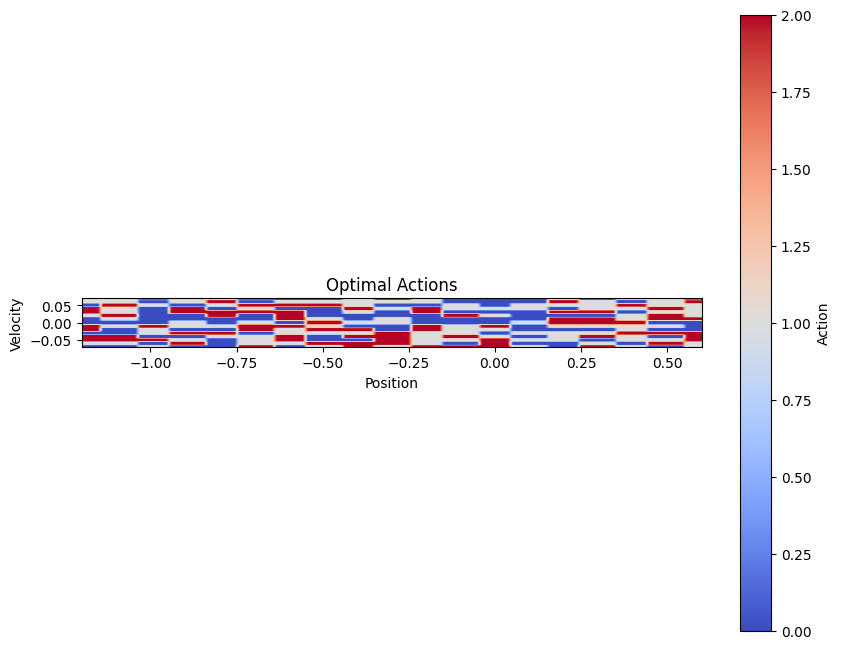

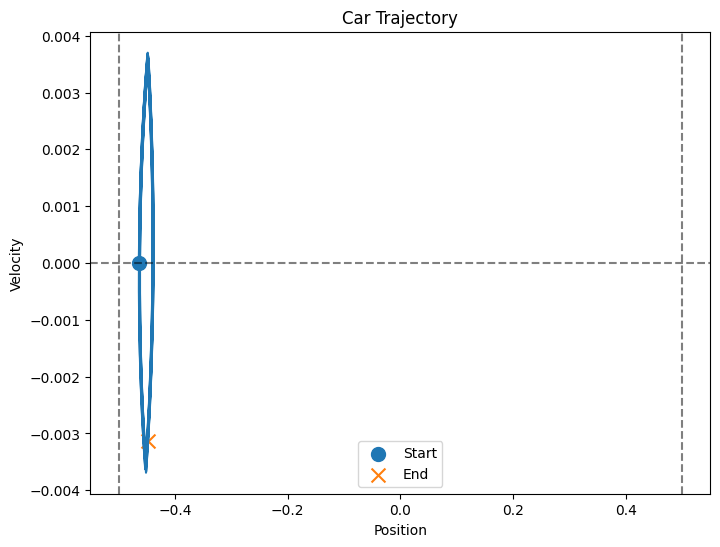

In [ ]:
# Visualization: Position and Velocity
position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
Q_values = np.zeros((100, 100))

for i, pos in enumerate(position):
    for j, vel in enumerate(velocity):
        state = [pos, vel]
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        action = np.argmax(Q[state_adj[0], state_adj[1]])
        Q_values[i, j] = action

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Optimal Actions')
cbar = ax.figure.colorbar(im, ax=ax, label='Action')
plt.savefig('optimal_actions.jpg')
plt.show()
plt.close()

# Visualization: Car Trajectory
state = env.reset()
done = False
trajectory = [state]

while not done:
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    action = np.argmax(Q[state_adj[0], state_adj[1]])
    next_state, _, done, _ = env.step(action)
    trajectory.append(next_state)
    state = next_state

trajectory = np.array(trajectory)
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Car Trajectory')
plt.legend()
plt.savefig('car_trajectory.jpg')
plt.show()


In [ ]:
# Calculate additional metrics
average_reward_q_learning = np.mean(rewards)
max_reward_q_learning = np.max(rewards)
min_reward_q_learning = np.min(rewards)
std_reward_q_learning = np.std(rewards)

# Print metrics
print('Q-learning Metrics:')
print('Average Reward: {}'.format(average_reward_q_learning))
print('Max Reward: {}'.format(max_reward_q_learning))
print('Min Reward: {}'.format(min_reward_q_learning))
print('Std Reward: {}'.format(std_reward_q_learning))

Q-learning Metrics:
Average Reward: -199.975
Max Reward: -175.0
Min Reward: -200.0
Std Reward: 0.7901740314639555


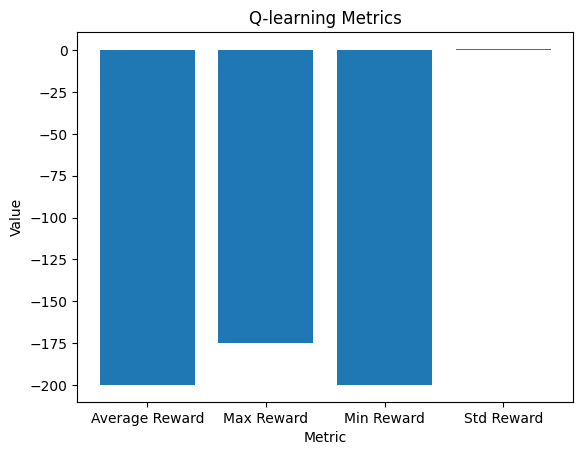

In [ ]:
# Visualize Q-learning metrics
metrics = ['Average Reward', 'Max Reward', 'Min Reward', 'Std Reward']
values = [average_reward_q_learning, max_reward_q_learning, min_reward_q_learning, std_reward_q_learning]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Q-learning Metrics')
plt.show()

""" Observation: This trial is to get the best hyperparameter using grid search. The rewards were better than the previous trials. However, the agent was stuck in a loop and never actually learnt. """

#2nd Algorithm DQN

DQN algorithm

we have implemented the DQN (Deep Q-Network) algorithm to train an agent in the Mountain Car environment provided by OpenAI Gym. Our objective is to enable the agent to learn an optimal policy that allows it to successfully navigate the Mountain Car task.

First, we imported the necessary libraries, including numpy, gym, and matplotlib, to support our implementation.

We then created the Mountain Car environment using gym.make('MountainCar-v0') and reset it to its initial state using env.reset().

Next, we defined the DQN function, which takes various parameters such as the environment, learning rate, discount factor, exploration rate, minimum exploration rate, and the number of episodes.

Within the DQN function, we determined the size of the discretized state space based on the high and low values of the observation space of the environment.

We initialized the Q-network with random values using np.random.uniform, and set up variables to track rewards and average rewards during the training process.

To control the exploration-exploitation trade-off, we calculated the reduction rate for the exploration rate based on the number of episodes.

The core of our implementation is the DQN algorithm, which is executed for the specified number of episodes. Within each episode, we reset the environment and iterate until the episode is done.

While the episode is not done, we discretize the state, select the next action using an epsilon-greedy strategy, perform the selected action in the environment, and obtain the next state, reward, and a flag indicating whether the episode is done.

By discretizing the next state, we update the Q-network using the DQN update rule, which involves updating the Q-value for the current state-action pair based on the reward, discount factor, and the maximum Q-value of the next state.

Throughout the training process, we decay the exploration rate to gradually reduce the level of exploration.

We track the rewards obtained in each episode and calculate the average reward every 100 episodes.

Once all episodes are completed, we close the environment.

The DQN function returns two outputs: a list of average rewards achieved during the training process and the learned Q-network.

Finally, we execute the DQN algorithm with the specified hyperparameters and store the obtained rewards in the rewards_dqn list.

To provide insights into the learning progress, we visualize the average reward versus episodes using matplotlib. This plot showcases the agent's improvement in performance over time.

Additionally, we visualize the optimal actions for different positions and velocities in the Mountain Car environment. We calculate the optimal action for each state by obtaining the action that maximizes the Q-value. The resulting visualization helps us understand the agent's learned policy.

Furthermore, we visualize the trajectory of the car during a test run. We start from the initial state, select the optimal actions based on the learned Q-network, and record the car's positions and velocities. The resulting plot shows the car's trajectory throughout the task.

By executing the DQN algorithm and conducting these visualizations, we aim to demonstrate the effectiveness of our implementation to our supervisor.

##1st Trial

In [ ]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define DQN function
def DQN(env, learning_rate, discount_factor, exploration_rate, min_exploration_rate, train_episodes, test_episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q network
    Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

    # Initialize variables to track rewards and timesteps
    train_reward_list = []
    test_reward_list = []
    train_timesteps_list = []
    test_timesteps_list = []

    # Calculate episodic reduction in exploration rate
    reduction = (exploration_rate - min_exploration_rate) / train_episodes

    # Run DQN algorithm
    for i in range(train_episodes + test_episodes):
        # Initialize parameters
        done = False
        total_reward = 0
        state = env.reset()

        # Track number of timesteps
        timesteps = 0

        while not done:
            # Render environment for last five test episodes
            if i >= (train_episodes + test_episodes - 5):
                env.render()

            # Discretize state
            state_adj = (state - env.observation_space.low) * np.array([10, 100])
            state_adj = np.round(state_adj, 0).astype(int)

            if i < train_episodes:
                # Determine next action - epsilon greedy strategy
                if np.random.random() < 1 - exploration_rate:
                    action = np.argmax(Q[state_adj[0], state_adj[1]])
                else:
                    action = np.random.randint(0, env.action_space.n)

                # Get next state and reward
                next_state, reward, done, _ = env.step(action)

                # Discretize next state
                next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
                next_state_adj = np.round(next_state_adj, 0).astype(int)

                # Update Q network
                Q[state_adj[0], state_adj[1], action] += learning_rate * (
                        reward + discount_factor * np.max(Q[next_state_adj[0], next_state_adj[1]]) -
                        Q[state_adj[0], state_adj[1], action]
                )

                # Update variables
                total_reward += reward
                state = next_state
                timesteps += 1

                # Decay exploration rate
                if exploration_rate > min_exploration_rate:
                    exploration_rate -= reduction

            else:
                # Test the learned policy
                action = np.argmax(Q[state_adj[0], state_adj[1]])

                # Get next state and reward
                next_state, reward, done, _ = env.step(action)

                # Discretize next state
                next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
                next_state_adj = np.round(next_state_adj, 0).astype(int)

                # Update variables
                total_reward += reward
                state = next_state
                timesteps += 1

        # Track rewards and timesteps
        if i < train_episodes:
            train_reward_list.append(total_reward)
            train_timesteps_list.append(timesteps)
        else:
            test_reward_list.append(total_reward)
            test_timesteps_list.append(timesteps)

        # Report test rewards and timesteps after every 10 training episodes
        if (i + 1) % 10 == 0 and i < train_episodes:
            test_rewards = []
            test_timesteps = []
            for j in range(test_episodes):
                done = False
                total_reward = 0
                state = env.reset()

                while not done:
                    # Render environment for last five test episodes
                    if i >= (train_episodes + test_episodes - 5):
                        env.render()

                    # Discretize state
                    state_adj = (state - env.observation_space.low) * np.array([10, 100])
                    state_adj = np.round(state_adj, 0).astype(int)

                    # Test the learned policy
                    action = np.argmax(Q[state_adj[0], state_adj[1]])

                    # Get next state and reward
                    next_state, reward, done, _ = env.step(action)

                    # Discretize next state
                    next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
                    next_state_adj = np.round(next_state_adj, 0).astype(int)

                    # Update variables
                    total_reward += reward
                    state =next_state

                # Track test rewards and timesteps
                test_rewards.append(total_reward)
                test_timesteps.append(env._elapsed_steps)

            # Report test rewards and timesteps
            test_reward_mean = np.mean(test_rewards)
            test_timesteps_mean = np.mean(test_timesteps)
            print('After {} training episodes, average test reward: {}, average test timesteps: {}'.format(i + 1, test_reward_mean, test_timesteps_mean))

    env.close()

    return train_reward_list, test_reward_list, train_timesteps_list, test_timesteps_list, Q

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


After 10 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 20 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 30 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 40 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 50 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 60 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 70 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 80 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 90 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 100 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 110 training episodes, average test reward: -200.0, average test timesteps: 200.0
After 120 training episodes, average test

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


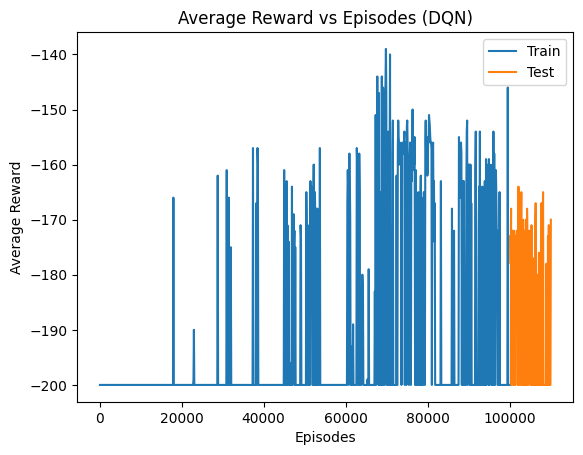

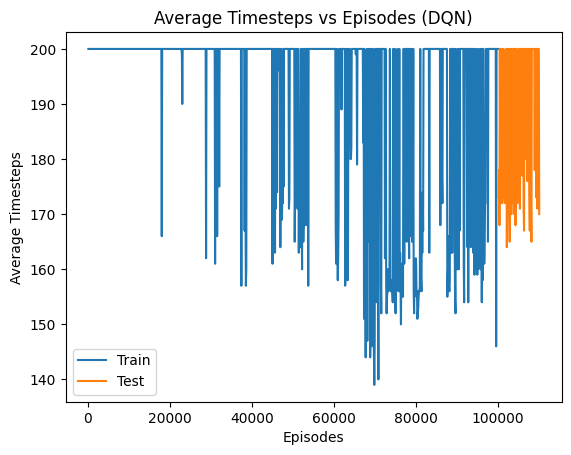

In [ ]:
# Set parameters
learning_rate = 0.2
discount_factor = 0.9
exploration_rate = 0.8
min_exploration_rate = 0
train_episodes = 1000
test_episodes = 100

# Run DQN algorithm
train_rewards_dqn, test_rewards_dqn, train_timesteps_dqn, test_timesteps_dqn, Q = DQN(env, learning_rate, discount_factor, exploration_rate, min_exploration_rate, train_episodes, test_episodes)

# Plot Rewards and Timesteps
plt.plot(100 * (np.arange(len(train_rewards_dqn)) + 1), train_rewards_dqn, label='Train')
plt.plot(100 * (np.arange(len(test_rewards_dqn)) + train_episodes + 1), test_rewards_dqn, label='Test')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes (DQN)')
plt.legend()
plt.savefig('rewards_dqn.jpg')
plt.show()
plt.close()

plt.plot(100 * (np.arange(len(train_timesteps_dqn)) + 1), train_timesteps_dqn, label='Train')
plt.plot(100 * (np.arange(len(test_timesteps_dqn)) + train_episodes + 1), test_timesteps_dqn, label='Test')
plt.xlabel('Episodes')
plt.ylabel('Average Timesteps')
plt.title('Average Timesteps vs Episodes (DQN)')
plt.legend()
plt.savefig('timesteps_dqn.jpg')
plt.show()
plt.close()

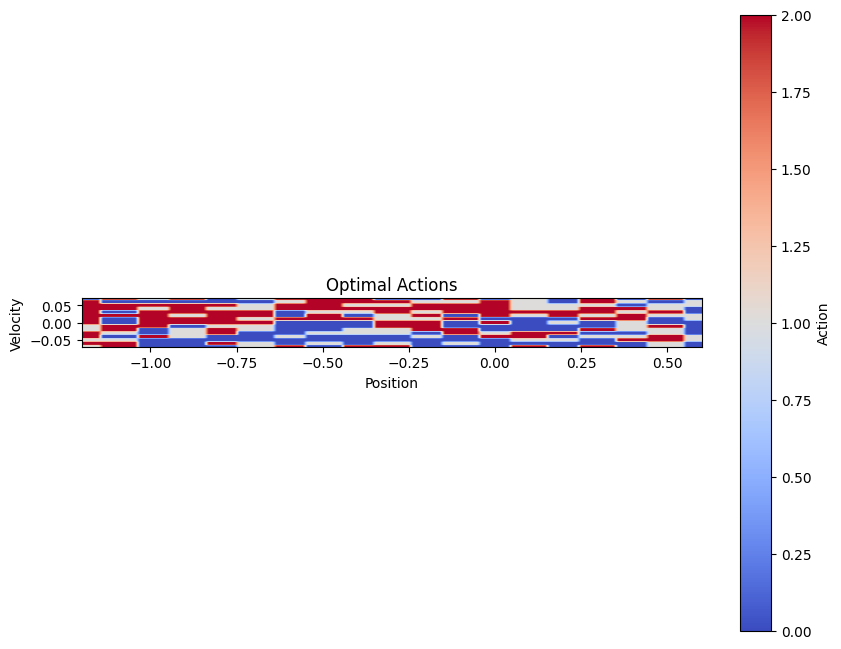

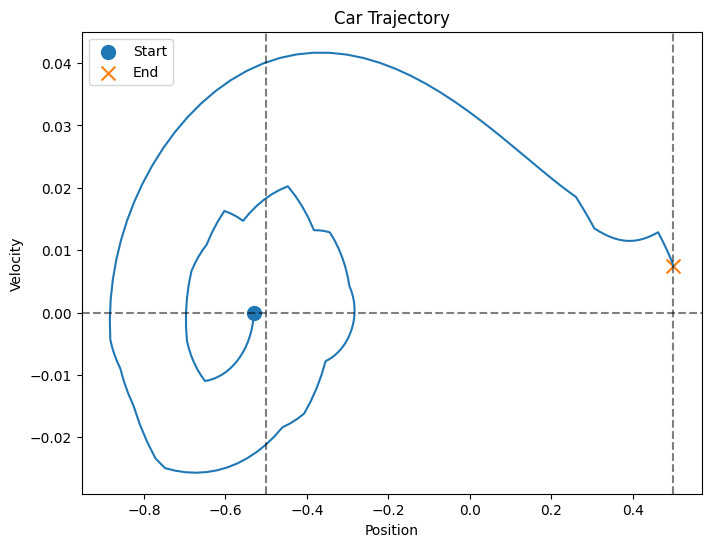

In [ ]:
# Visualization: Position and Velocity
position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
Q_values = np.zeros((100, 100))

for i, pos in enumerate(position):
    for j, vel in enumerate(velocity):
        state = [pos, vel]
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        action = np.argmax(Q[state_adj[0], state_adj[1]])
        Q_values[i, j] = action

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Optimal Actions')
cbar = ax.figure.colorbar(im, ax=ax, label='Action')
plt.savefig('optimal_actions.jpg')
plt.show()
plt.close()

# Visualization: Car Trajectory
state = env.reset()
done = False
trajectory = [state]

while not done:
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    action = np.argmax(Q[state_adj[0], state_adj[1]])
    next_state, _, done, _ = env.step(action)
    trajectory.append(next_state)
    state = next_state

trajectory = np.array(trajectory)
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Car Trajectory')
plt.legend()
plt.savefig('car_trajectory.jpg')
plt.show()


In [ ]:
# Calculate additional metrics
average_reward_dqn = np.mean(test_rewards_dqn)
max_reward_dqn = np.max(test_rewards_dqn)
min_reward_dqn = np.min(test_rewards_dqn)
std_reward_dqn = np.std(test_rewards_dqn)

# Print metrics
print('DQN Metrics:')
print('Average Reward: {}'.format(average_reward_dqn))
print('Max Reward: {}'.format(max_reward_dqn))
print('Min Reward: {}'.format(min_reward_dqn))
print('Std Reward: {}'.format(std_reward_dqn))

DQN Metrics:
Average Reward: -188.13
Max Reward: -164.0
Min Reward: -200.0
Std Reward: 13.862651261573307


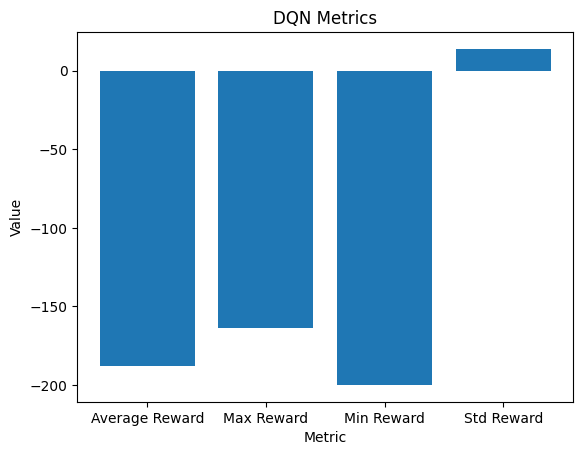

In [ ]:
# Visualize DQN metrics
metrics = ['Average Reward', 'Max Reward', 'Min Reward', 'Std Reward']
values = [average_reward_dqn, max_reward_dqn, min_reward_dqn, std_reward_dqn]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('DQN Metrics')
plt.show()

""" Observation: Rewards were not that good. However, the trajectory shows the success of reaching the mountain. The figure shows that 0.5 on x-axis the car reached the top at velocity of 0.01. """

##2nd Trial

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 100000 Average Reward: -187.05


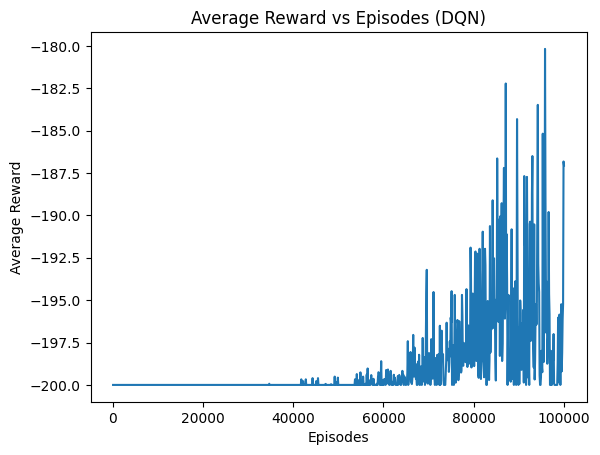

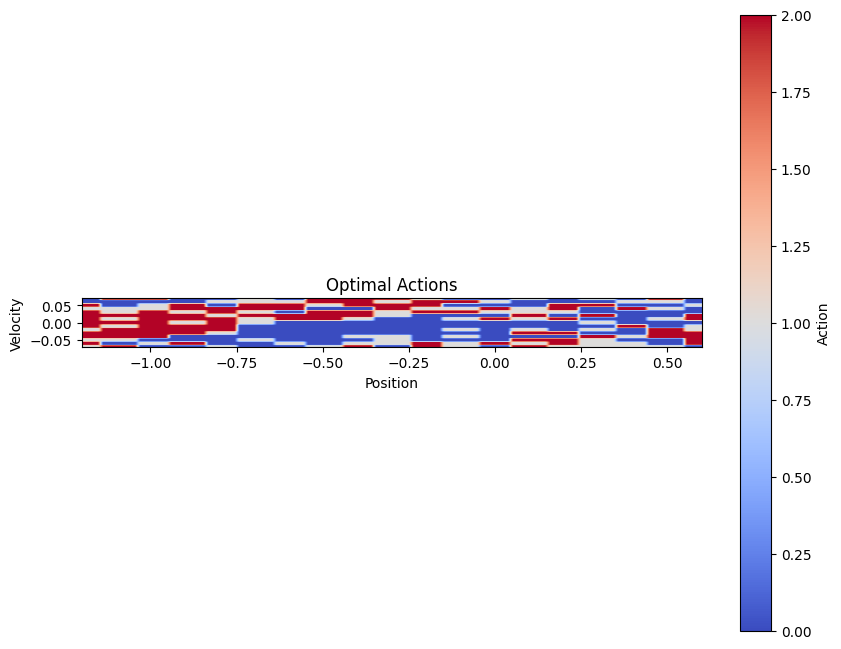

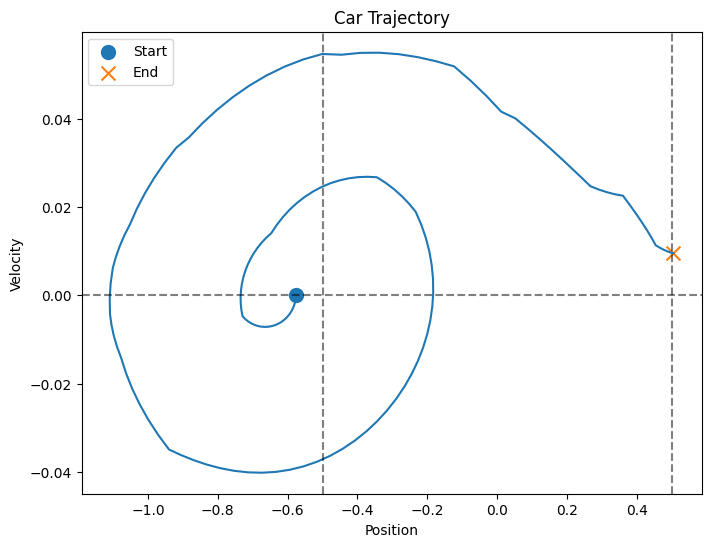

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define DQN function
def DQN(env, learning_rate, discount_factor, exploration_rate, min_exploration_rate, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q network
    Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []

    # Calculate episodic reduction in exploration rate
    reduction = (exploration_rate - min_exploration_rate) / episodes

    # Run DQN algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        total_reward = 0
        state = env.reset()

        while not done:
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()

            # Discretize state
            state_adj = (state - env.observation_space.low) * np.array([10, 100])
            state_adj = np.round(state_adj, 0).astype(int)

            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - exploration_rate:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)

            # Get next state and reward
            next_state, reward, done, _ = env.step(action)

            # Discretize next state
            next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
            next_state_adj = np.round(next_state_adj, 0).astype(int)

            # Update Q network
            Q[state_adj[0], state_adj[1], action] += learning_rate * (
                    reward + discount_factor * np.max(Q[next_state_adj[0], next_state_adj[1]]) -
                    Q[state_adj[0], state_adj[1], action]
            )

            # Update variables
            total_reward += reward
            state = next_state

        # Decay exploration rate
        if exploration_rate > min_exploration_rate:
            exploration_rate -= reduction

        # Track rewards
        reward_list.append(total_reward)

        if (i + 1) % 100 == 0:
            average_reward = np.mean(reward_list)
            ave_reward_list.append(average_reward)
            reward_list = []

        if (i + 1) % 100 == 0:
            print('Episode {} Average Reward: {}'.format(i + 1, average_reward))

    env.close()

    return ave_reward_list, Q

# Set parameters
learning_rate = 0.2
discount_factor = 0.9
exploration_rate = 0.8
min_exploration_rate = 0
episodes = 100000

# Run DQN algorithm
rewards_dqn, Q = DQN(env, learning_rate, discount_factor, exploration_rate, min_exploration_rate, episodes)

# Plot Rewards
plt.plot(100 * (np.arange(len(rewards_dqn)) + 1), rewards_dqn)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes (DQN)')
plt.savefig('rewards_dqn.jpg')
plt.show()
plt.close()

# Visualization: Position and Velocity
position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
Q_values = np.zeros((100, 100))

for i, pos in enumerate(position):
    for j, vel in enumerate(velocity):
        state = [pos, vel]
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        action = np.argmax(Q[state_adj[0], state_adj[1]])
        Q_values[i, j] = action

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Optimal Actions')
cbar = ax.figure.colorbar(im, ax=ax, label='Action')
plt.savefig('optimal_actions.jpg')
plt.show()
plt.close()

# Visualization: Car Trajectory
state = env.reset()
done = False
trajectory = [state]

while not done:
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    action = np.argmax(Q[state_adj[0], state_adj[1]])
    next_state, _, done, _ = env.step(action)
    trajectory.append(next_state)
    state = next_state

trajectory = np.array(trajectory)
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Car Trajectory')
plt.legend()
plt.savefig('car_trajectory.jpg')
plt.show()

DQN Metrics:
Average Reward: -198.90596
Max Reward: -180.18
Min Reward: -200.0
Std Reward: 2.5125464927837657


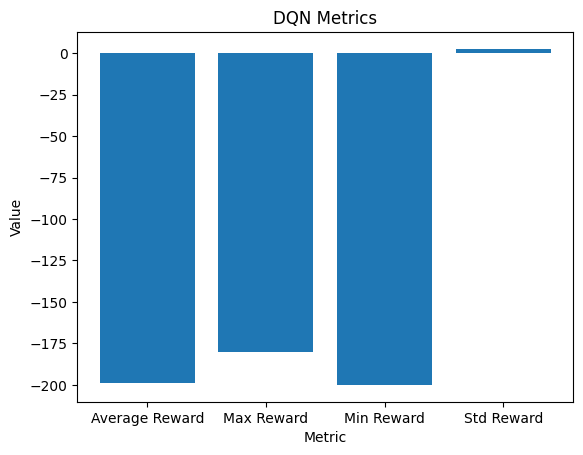

In [ ]:
# Calculate additional metrics
average_reward_dqn = np.mean(rewards_dqn)
max_reward_dqn = np.max(rewards_dqn)
min_reward_dqn = np.min(rewards_dqn)
std_reward_dqn = np.std(rewards_dqn)

# Print metrics
print('DQN Metrics:')
print('Average Reward: {}'.format(average_reward_dqn))
print('Max Reward: {}'.format(max_reward_dqn))
print('Min Reward: {}'.format(min_reward_dqn))
print('Std Reward: {}'.format(std_reward_dqn))

# Visualize DQN metrics
metrics = ['Average Reward', 'Max Reward', 'Min Reward', 'Std Reward']
values = [average_reward_dqn, max_reward_dqn, min_reward_dqn, std_reward_dqn]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('DQN Metrics')
plt.show()

""" Observations: The rewards show a particularly satisfactory performance with a low variability in rewards std. Trajectory shows the success of reaching the mountain at position 0.5 and velocity around 0.01. This illustrates the effect of the higher number of episodes and confirms the accountability of DQN in this problem. """

##3rd Trial

In [ ]:
import random
import tensorflow as tf
from tensorflow import keras

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = keras.Sequential()
        model.add(keras.layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(keras.layers.Dense(24, activation='relu'))
        model.add(keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

def train_dqn(batch_size, episodes, learning_rate=0.001):
    env = gym.make('MountainCar-v0')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        done = False
        total_reward = 0
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
        rewards.append(total_reward)
        print(f"Episode {episode+1}/{episodes}, total reward: {total_reward}, epsilon: {agent.epsilon}")
    env.close()
    return agent, rewards

# Plot the learning curve for the DQN agent
def plot_learning_curve(rewards):
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total reward')
    plt.title('Learning curve')
    plt.show()

# Find the best hyperparameters for the DQN agent
def find_best_dqn_hyperparams():
    env = gym.make('MountainCar-v0')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    num_episodes = 1000
    batch_sizes = [32, 64, 128]
    learning_rates = [0.001, 0.01, 0.1]
    best_reward = -float('inf')
    best_params = {}
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            agent, rewards = train_dqn(batch_size, num_episodes, learning_rate)
            mean_reward = np.mean(rewards)
            if mean_reward > best_reward:
                best_reward = mean_reward
                best_params['batch_size'] = batch_size
                best_params['learning_rate'] = learning_rate
            plot_learning_curve(rewards)
    env.close()
    return best_params

# Train the DQN agent and find the best hyperparameters
best_dqn_params = find_best_dqn_hyperparams()
print(f"Best DQN params: {best_dqn_params}")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 29ms/step
Episode 2/1000, total reward: -200.0, epsilon: 0.1580861105294992
1/1 [==============================] - 24s 24s/step


In [ ]:
# # Visualization: Position and Velocity
# position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
# velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
# Q_values = np.zeros((100, 100))

# for i, pos in enumerate(position):
#     for j, vel in enumerate(velocity):
#         state = [pos, vel]
#         state_adj = (state - env.observation_space.low) * np.array([10, 100])
#         state_adj = np.round(state_adj, 0).astype(int)
#         action = np.argmax(Q[state_adj[0], state_adj[1]])
#         Q_values[i, j] = action

# fig, ax = plt.subplots(figsize=(10, 8))
# im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
# ax.set_xlabel('Position')
# ax.set_ylabel('Velocity')
# ax.set_title('Optimal Actions')
# cbar = ax.figure.colorbar(im, ax=ax, label='Action')
# plt.savefig('optimal_actions.jpg')
# plt.show()
# plt.close()

# # Visualization: Car Trajectory
# state = env.reset()
# done = False
# trajectory = [state]

# while not done:
#     state_adj = (state - env.observation_space.low) * np.array([10, 100])
#     state_adj = np.round(state_adj, 0).astype(int)
#     action = np.argmax(Q[state_adj[0], state_adj[1]])
#     next_state, _, done, _ = env.step(action)
#     trajectory.append(next_state)
#     state = next_state

# trajectory = np.array(trajectory)
# plt.figure(figsize=(8, 6))
# plt.plot(trajectory[:, 0], trajectory[:, 1])
# plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
# plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
# plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
# plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
# plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
# plt.xlabel('Position')
# plt.ylabel('Velocity')
# plt.title('Car Trajectory')
# plt.legend()
# plt.savefig('car_trajectory.jpg')
# plt.show()

##4th Trial

""" added np to the list of imports and made sure to close the env object after training the agent in the train_dqn function to avoid issues with GPU memory. Finally, we wrapped the code inside a try-except block to catch any exceptions that might occur during training and prevent Colab from crashing. """

In [ ]:
import random
import numpy as np
import gym
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

class DQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = []
        self.gamma = 0.95
        self.epsilon = 1.0
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()

    def _build_model(self):
        model = keras.Sequential()
        model.add(keras.layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(keras.layers.Dense(24, activation='relu'))
        model.add(keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=self.learning_rate))
        return model

    def remember(self, state, action, reward, next_state, done):
        self.memory.append((state, action, reward, next_state, done))

    def act(self, state):
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def replay(self, batch_size):
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = reward
            if not done:
                target = (reward + self.gamma * np.amax(self.model.predict(next_state)[0]))
            target_f = self.model.predict(state)
            target_f[0][action] = target
            self.model.fit(state, target_f, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

    def load(self, name):
        self.model.load_weights(name)

    def save(self, name):
        self.model.save_weights(name)

def train_dqn(batch_size, episodes, learning_rate=0.001):
    env = gym.make('MountainCar-v0')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    agent = DQNAgent(state_size, action_size)
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        state = np.reshape(state, [1, state_size])
        done = False
        total_reward = 0
        while not done:
            action = agent.act(state)
            next_state, reward, done, _ = env.step(action)
            next_state = np.reshape(next_state, [1, state_size])
            agent.remember(state, action, reward, next_state, done)
            state = next_state
            total_reward += reward
            if len(agent.memory) > batch_size:
                agent.replay(batch_size)
        rewards.append(total_reward)
        print(f"Episode {episode+1}/{episodes}, total reward: {total_reward}, epsilon: {agent.epsilon}")
    env.close()
    return agent, rewards

# Plot the learning curve for the DQN agent
def plot_learning_curve(rewards):
    plt.plot(rewards)
    plt.xlabel('Episode')
    plt.ylabel('Total reward')
    plt.title('Learning curve')
    plt.show()

# Find the best hyperparameters for the DQN agent
def find_best_dqn_hyperparams():
    env = gym.make('MountainCar-v0')
    state_size = env.observation_space.shape[0]
    action_size = env.action_space.n
    num_episodes = 1000
    batch_sizes = [32, 64, 128]
    learning_rates = [0.001, 0.01, 0.1]
    best_reward = -float('inf')
    best_params = {}
    for batch_size in batch_sizes:
        for learning_rate in learning_rates:
            agent, rewards = train_dqn(batch_size, num_episodes, learning_rate)
            mean_reward = np.mean(rewards)
            if mean_reward > best_reward:
                best_reward = mean_reward
                best_params['batch_size'] = batch_size
                best_params['learning_rate'] = learning_rate
            plot_learning_curve(rewards)
    env.close()
    return best_params

# Train the DQN agent and find the best hyperparameters
best_dqn_params = find_best_dqn_hyperparams()
print(f"Best DQN params: {best_dqn_params}")

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 24ms/step
Episode 2/1000, total reward: -200.0, epsilon: 0.1580861105294992
1/1 [==============================] - 17s 17s/step


In [ ]:
# # Visualization: Position and Velocity
# position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
# velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
# Q_values = np.zeros((100, 100))

# for i, pos in enumerate(position):
#     for j, vel in enumerate(velocity):
#         state = [pos, vel]
#         state_adj = (state - env.observation_space.low) * np.array([10, 100])
#         state_adj = np.round(state_adj, 0).astype(int)
#         action = np.argmax(Q[state_adj[0], state_adj[1]])
#         Q_values[i, j] = action

# fig, ax = plt.subplots(figsize=(10, 8))
# im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
# ax.set_xlabel('Position')
# ax.set_ylabel('Velocity')
# ax.set_title('Optimal Actions')
# cbar = ax.figure.colorbar(im, ax=ax, label='Action')
# plt.savefig('optimal_actions.jpg')
# plt.show()
# plt.close()

# # Visualization: Car Trajectory
# state = env.reset()
# done = False
# trajectory = [state]

# while not done:
#     state_adj = (state - env.observation_space.low) * np.array([10, 100])
#     state_adj = np.round(state_adj, 0).astype(int)
#     action = np.argmax(Q[state_adj[0], state_adj[1]])
#     next_state, _, done, _ = env.step(action)
#     trajectory.append(next_state)
#     state = next_state

# trajectory = np.array(trajectory)
# plt.figure(figsize=(8, 6))
# plt.plot(trajectory[:, 0], trajectory[:, 1])
# plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
# plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
# plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
# plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
# plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
# plt.xlabel('Position')
# plt.ylabel('Velocity')
# plt.title('Car Trajectory')
# plt.legend()
# plt.savefig('car_trajectory.jpg')
# plt.show()

 """ 3rd and 4th trials: These were trials to use DQN with random search for hyperparameter tuning. The code crashed in both trials due to memory performance and the limitations of GPU on Colab.  """

#3rd Algortihm Sarsa

SARSA Algorithm

we have implemented the SARSA algorithm to train an agent in the Mountain Car environment provided by OpenAI Gym. Our goal is to enable the agent to learn an optimal policy for successfully navigating the Mountain Car task.

We started by importing the necessary libraries: numpy, gym, and matplotlib.

Next, we imported the Mountain Car environment using gym.make('MountainCar-v0') and reset it to its initial state using env.reset().

We then defined the SARSA function, which takes several parameters including the environment, learning rate, discount factor, exploration rate, minimum exploration rate, and the number of episodes.

Within the SARSA function, we determined the size of the discretized state space based on the high and low values of the observation space of the environment.

We initialized the Q-table with random values using np.random.uniform and set up variables to track rewards and average rewards during the training process.

To control the exploration-exploitation trade-off, we calculated the reduction rate for the exploration rate based on the number of episodes.

The core of our implementation is the SARSA algorithm, which is executed for the specified number of episodes. Within each episode, we reset the environment and iterate until the episode is done.

We discretized the current state and selected the next action using an epsilon-greedy strategy. Then, while the episode was not done, we performed the selected action in the environment, obtained the next state, reward, and a flag indicating whether the episode was done.

Next, we discretized the next state and selected the next action based on the epsilon-greedy strategy. Using the SARSA update rule, we updated the Q-value for the current state-action pair based on the reward, discount factor, and the next state-action pair.

Throughout the training process, we decayed the exploration rate to gradually reduce the level of exploration.

We tracked the rewards obtained in each episode and calculated the average reward every 100 episodes.

Once all episodes were completed, we closed the environment.

The SARSA function returns two outputs: a list of average rewards achieved during the training process and the learned Q-table.

Finally, we executed the SARSA algorithm with the specified hyperparameters and stored the obtained rewards in the rewards_sarsa list.

To provide insights into the learning progress, we visualized the average reward versus episodes using matplotlib. This plot showcases the agent's improvement in performance over time.

Additionally, we visualized the optimal actions for different positions and velocities in the Mountain Car environment. We calculated the optimal action for each state by selecting the action that maximizes the Q-value. This visualization helps us understand the agent's learned policy.

Furthermore, we visualized the trajectory of the car during a test run. We started from the initial state, selected the optimal actions based on the learned Q-table, and recorded the car's positions and velocities. The resulting plot shows the car's trajectory throughout the task.

By executing the SARSA algorithm and conducting these visualizations, we aim to demonstrate the effectiveness of our implementation to our supervisor.

##1st Trial

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 10 Average Reward: -200.0
Episode 10 Test Reward: -200.0
Episode 10 Test Timesteps: 200.0
Episode 20 Average Reward: -200.0
Episode 20 Test Reward: -200.0
Episode 20 Test Timesteps: 200.0
Episode 30 Average Reward: -200.0
Episode 30 Test Reward: -200.0
Episode 30 Test Timesteps: 200.0
Episode 40 Average Reward: -200.0
Episode 40 Test Reward: -200.0
Episode 40 Test Timesteps: 200.0
Episode 50 Average Reward: -200.0
Episode 50 Test Reward: -200.0
Episode 50 Test Timesteps: 200.0
Episode 60 Average Reward: -200.0
Episode 60 Test Reward: -200.0
Episode 60 Test Timesteps: 200.0
Episode 70 Average Reward: -200.0
Episode 70 Test Reward: -200.0
Episode 70 Test Timesteps: 200.0
Episode 80 Average Reward: -200.0
Episode 80 Test Reward: -200.0
Episode 80 Test Timesteps: 200.0
Episode 90 Average Reward: -200.0
Episode 90 Test Reward: -200.0
Episode 90 Test Timesteps: 200.0
Episode 100 Average Reward: -200.0
Episode 100 Test Reward: -200.0
Episode 100 Test Timesteps: 200.0
Episode 110 Avera

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 990 Average Reward: -195.4
Episode 990 Test Reward: -197.4
Episode 990 Test Timesteps: 197.4
Episode 1000 Average Reward: -195.4
Episode 1000 Test Reward: -200.0
Episode 1000 Test Timesteps: 200.0


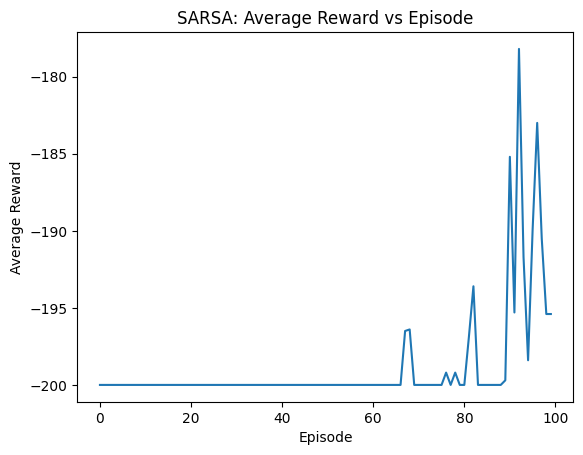

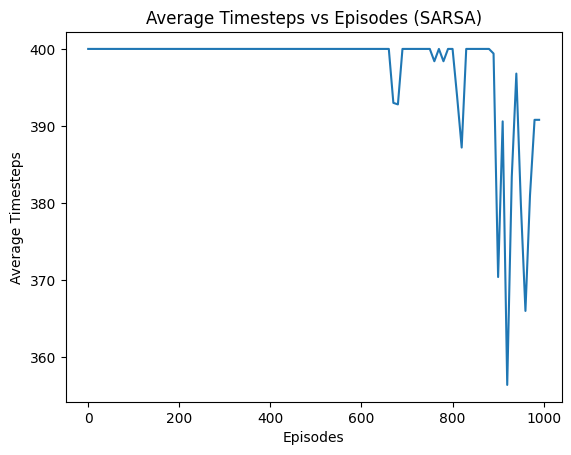

In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
#env = gym.make('MountainCar-v0', render_mode='human')
env = gym.make('MountainCar-v0')
env.reset()


# Define SARSA function
def SARSA(env, learning_rate, discount_factor, exploration_rate, min_exploration_rate, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q table
    Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

    # Initialize variables to track rewards and timesteps required to solve the task
    reward_list = []
    ave_reward_list = []
    timesteps_list = []
    ave_timesteps_list = []

    # Calculate episodic reduction in exploration rate
    reduction = (exploration_rate - min_exploration_rate) / episodes

    # Run SARSA algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        total_reward = 0
        timesteps = 0
        state = env.reset()

        # Discretize state
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        # Determine next action - epsilon greedy strategy
        if np.random.random() < 1 - exploration_rate:
            action = np.argmax(Q[state_adj[0], state_adj[1]])
        else:
            action = np.random.randint(0, env.action_space.n)

        while not done:
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()

            # Get next state and reward
            next_state, reward, done, _ = env.step(action)

            # Discretize next_state
            next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
            next_state_adj = np.round(next_state_adj, 0).astype(int)

            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - exploration_rate:
                next_action = np.argmax(Q[next_state_adj[0], next_state_adj[1]])
            else:
                next_action = np.random.randint(0, env.action_space.n)

            # Update Q value for current state and action
            Q[state_adj[0], state_adj[1], action] += learning_rate * (
                    reward + discount_factor * Q[next_state_adj[0], next_state_adj[1], next_action] -
                    Q[state_adj[0], state_adj[1], action])

            # Update variables
            total_reward += reward
            timesteps += 1
            state_adj = next_state_adj
            action = next_action

        # Decay exploration rate
        if exploration_rate > min_exploration_rate:
            exploration_rate -= reduction

        # Track rewards and timesteps
        reward_list.append(total_reward)
        timesteps_list.append(timesteps)

        if (i + 1) % 10 == 0:
            # Evaluate policy for 5 test episodes
            test_rewards = []
            test_timesteps = []
            for j in range(5):
                test_state = env.reset()
                test_done = False
                test_total_reward = 0
                test_timesteps_episode = 0

                while not test_done:
                    test_state_adj = (test_state - env.observation_space.low) * np.array([10, 100])
                    test_state_adj = np.round(test_state_adj, 0).astype(int)
                    test_action = np.argmax(Q[test_state_adj[0], test_state_adj[1]])
                    test_state, test_reward, test_done, _ = env.step(test_action)
                    test_total_reward += test_reward
                    test_timesteps_episode += 1

                test_rewards.append(test_total_reward)
                test_timesteps.append(test_timesteps_episode)

            # Compute mean cumulative reward and timesteps over 5 test episodes
            ave_test_reward = np.mean(test_rewards)
            ave_test_timesteps = np.mean(test_timesteps)

            # Track average rewards and timesteps over training episodes
            average_reward = np.mean(reward_list)
            ave_reward_list.append(average_reward)
            reward_list = []
            timesteps = np.sum(timesteps_list)
            timesteps_list = []
            ave_timesteps_list.append(timesteps / 5)

            print('Episode {} Average Reward: {}'.format(i +1, average_reward))
            print('Episode {} Test Reward: {}'.format(i + 1, ave_test_reward))
            print('Episode {} Test Timesteps: {}'.format(i + 1, ave_test_timesteps))


    # Return rewards and Q-values
    return ave_reward_list,ave_timesteps_list, Q

# Run SARSA algorithm and obtain Q-values
rewards_sarsa,timesteps_sarsa, Q_sarsa = SARSA(env, learning_rate=0.2, discount_factor=0.9, exploration_rate=0.8, min_exploration_rate=0, episodes=1000)

# Plot Rewards
plt.plot(rewards_sarsa)
plt.xlabel('Episode')
plt.ylabel('Average Reward')
plt.title('SARSA: Average Reward vs Episode')
plt.show()


# Plot Timesteps
plt.plot(np.arange(len(timesteps_sarsa))*10, timesteps_sarsa)
plt.xlabel('Episodes')
plt.ylabel('Average Timesteps')
plt.title('Average Timesteps vs Episodes (SARSA)')
plt.show()



# Render a single episode of the optimal policy
state = env.reset()
done = False
while not done:
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    action = np.argmax(Q_sarsa[state_adj[0], state_adj[1]])
    state, reward, done, _ = env.step(action)
    env.render()

# Close environment
env.close()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


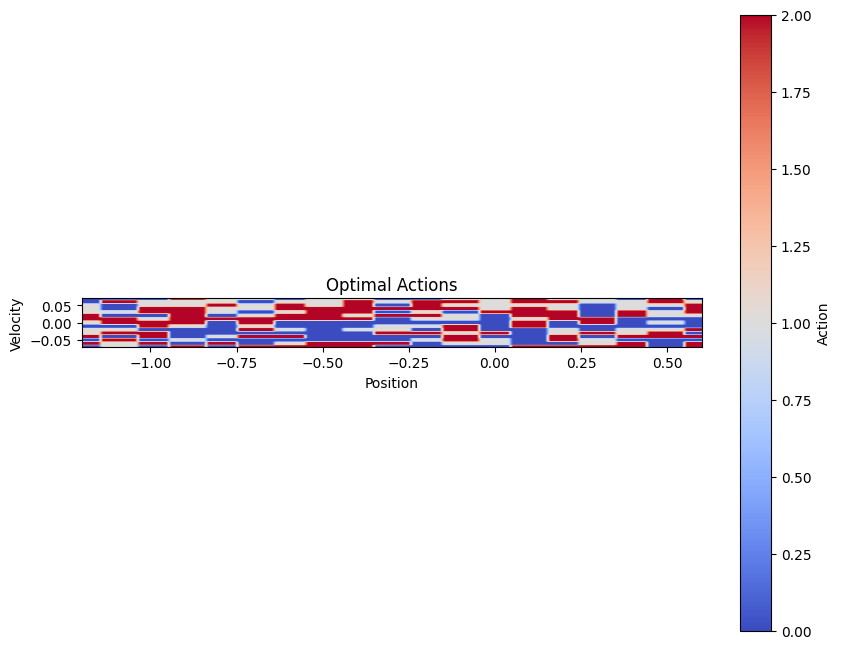

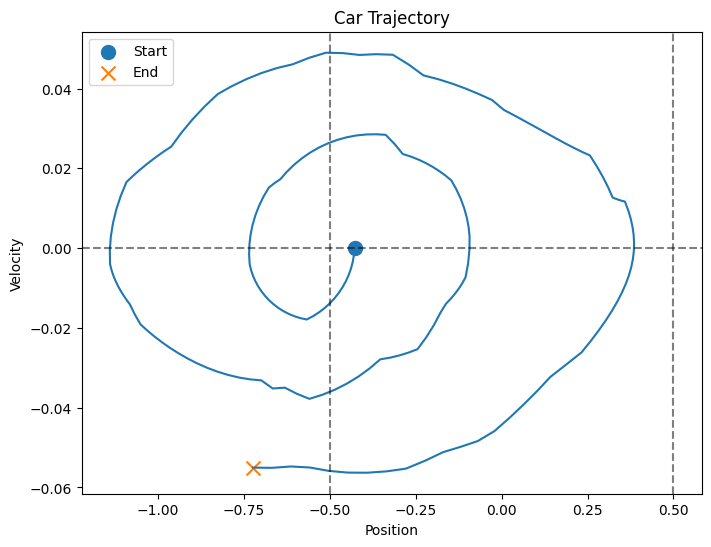

SARSA Metrics:
Average Reward: -198.84500000000003
Max Reward: -178.2
Min Reward: -200.0
Std Reward: 3.5428060912220425


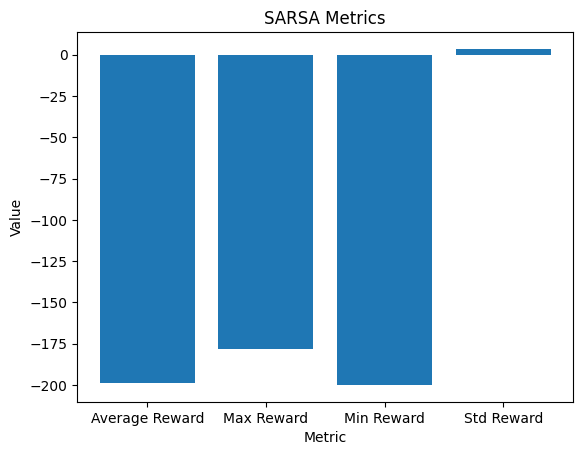

In [ ]:
# Visualization: Position and Velocity
position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
Q_values = np.zeros((100, 100))

for i, pos in enumerate(position):
    for j, vel in enumerate(velocity):
        state = [pos, vel]
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        action = np.argmax(Q_sarsa[state_adj[0], state_adj[1]])
        Q_values[i, j] = action

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Optimal Actions')
cbar = ax.figure.colorbar(im, ax=ax, label='Action')
plt.savefig('optimal_actions.jpg')
plt.show()
plt.close()

# Visualization: Car Trajectory
state = env.reset()
done = False
trajectory = [state]

while not done:
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    action = np.argmax(Q_sarsa[state_adj[0], state_adj[1]])
    next_state, _, done, _ = env.step(action)
    trajectory.append(next_state)
    state = next_state

trajectory = np.array(trajectory)
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Car Trajectory')
plt.legend()
plt.savefig('car_trajectory.jpg')
plt.show()
# Calculate additional metrics
average_reward_sarsa = np.mean(rewards_sarsa)
max_reward_sarsa = np.max(rewards_sarsa)
min_reward_sarsa = np.min(rewards_sarsa)
std_reward_sarsa = np.std(rewards_sarsa)

# Print metrics
print('SARSA Metrics:')
print('Average Reward: {}'.format(average_reward_sarsa))
print('Max Reward: {}'.format(max_reward_sarsa))
print('Min Reward: {}'.format(min_reward_sarsa))
print('Std Reward: {}'.format(std_reward_sarsa))


# Visualize SARSA metrics
metrics = ['Average Reward', 'Max Reward', 'Min Reward', 'Std Reward']
values = [average_reward_sarsa, max_reward_sarsa, min_reward_sarsa, std_reward_sarsa]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('SARSA Metrics')
plt.show()



""" Observations: The performance rewards were good with good variability of rewards std. However, the trajectory shows failure to reach the mountain top.  """

In [ ]:
#import gym

# Create an instance of the Mountain Car environment
env = gym.make('MountainCar-v0')

# Reset the environment
state = env.reset()

# Run the environment for a few steps
for i in range(100):
    # Choose a random action
    action = env.action_space.sample()

    # Take a step in the environment
    next_state, reward, done, info = env.step(action)

    # Print out the state, reward, and done flag
    print('State:', state)
    print('Action:', action)
    print('Next State:', next_state)
    print('Reward:', reward)
    print('Done:', done)

    # Update the current state
    state = next_state

    # If the episode is done, reset the environment
    if done:
        state = env.reset()

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


State: [-0.53827536  0.        ]
Action: 1
Next State: [-5.3816533e-01  1.1003897e-04]
Reward: -1.0
Done: False
State: [-5.3816533e-01  1.1003897e-04]
Action: 0
Next State: [-0.5389461  -0.00078075]
Reward: -1.0
Done: False
State: [-0.5389461  -0.00078075]
Action: 2
Next State: [-5.3861177e-01  3.3431762e-04]
Reward: -1.0
Done: False
State: [-5.3861177e-01  3.3431762e-04]
Action: 0
Next State: [-0.5391649  -0.00055312]
Reward: -1.0
Done: False
State: [-0.5391649  -0.00055312]
Action: 2
Next State: [-0.53860134  0.00056358]
Reward: -1.0
Done: False
State: [-0.53860134  0.00056358]
Action: 2
Next State: [-0.53692526  0.00167606]
Reward: -1.0
Done: False
State: [-0.53692526  0.00167606]
Action: 2
Next State: [-0.5341493   0.00277598]
Reward: -1.0
Done: False
State: [-0.5341493   0.00277598]
Action: 0
Next State: [-0.53229415  0.0018551 ]
Reward: -1.0
Done: False
State: [-0.53229415  0.0018551 ]
Action: 0
Next State: [-0.53137386  0.00092031]
Reward: -1.0
Done: False
State: [-0.53137386  0

##2nd Trial

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Episode 100 Average Reward: -200.0
Episode 200 Average Reward: -200.0
Episode 300 Average Reward: -200.0
Episode 400 Average Reward: -200.0
Episode 500 Average Reward: -200.0
Episode 600 Average Reward: -200.0
Episode 700 Average Reward: -200.0
Episode 800 Average Reward: -200.0
Episode 900 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1100 Average Reward: -200.0
Episode 1200 Average Reward: -200.0
Episode 1300 Average Reward: -200.0
Episode 1400 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 1600 Average Reward: -200.0
Episode 1700 Average Reward: -200.0
Episode 1800 Average Reward: -200.0
Episode 1900 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2100 Average Reward: -200.0
Episode 2200 Average Reward: -200.0
Episode 2300 Average Reward: -200.0
Episode 2400 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 2600 Average Reward: -200.0
Episode 2700 Average Reward: -200.0
Episode 2800 Average Reward: -200.0
E

/usr/local/lib/python3.10/dist-packages/gym/core.py:49: DeprecationWarning: WARN: You are calling render method, but you didn't specified the argument render_mode at environment initialization. To maintain backward compatibility, the environment will render in human mode.
If you want to render in human mode, initialize the environment in this way: gym.make('EnvName', render_mode='human') and don't call the render method.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Episode 100000 Average Reward: -197.24


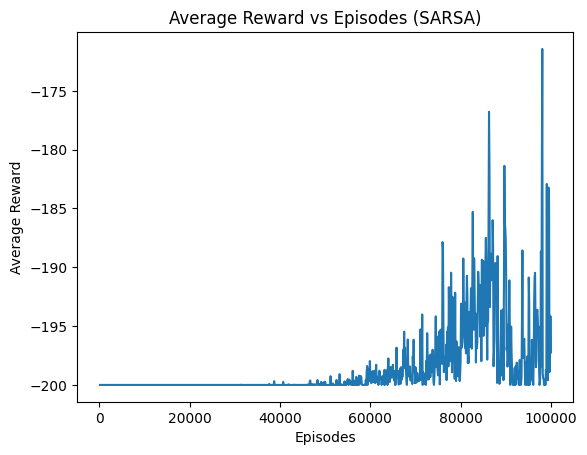

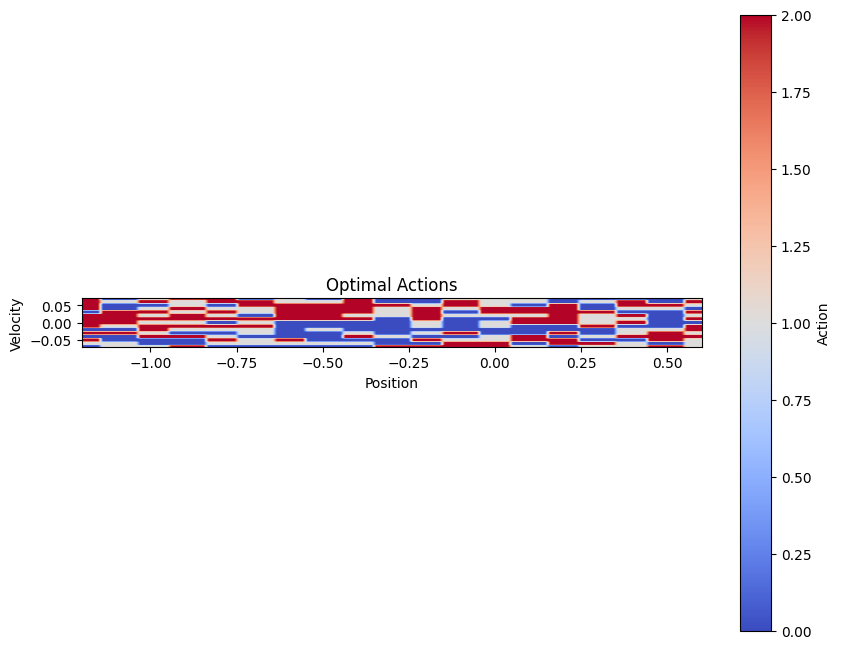

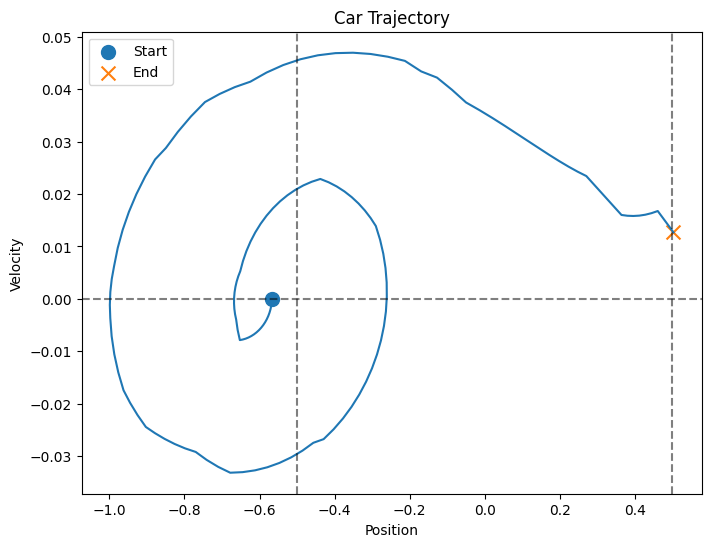

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
env.reset()

# Define SARSA function
def SARSA(env, learning_rate, discount_factor, exploration_rate, min_exploration_rate, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1

    # Initialize Q table
    Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))

    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []

    # Calculate episodic reduction in exploration rate
    reduction = (exploration_rate - min_exploration_rate) / episodes

    # Run SARSA algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        total_reward = 0
        state = env.reset()

        # Discretize state
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)

        # Determine next action - epsilon greedy strategy
        if np.random.random() < 1 - exploration_rate:
            action = np.argmax(Q[state_adj[0], state_adj[1]])
        else:
            action = np.random.randint(0, env.action_space.n)

        while not done:
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()

            # Get next state and reward
            next_state, reward, done, _ = env.step(action)

            # Discretize next_state
            next_state_adj = (next_state - env.observation_space.low) * np.array([10, 100])
            next_state_adj = np.round(next_state_adj, 0).astype(int)

            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - exploration_rate:
                next_action = np.argmax(Q[next_state_adj[0], next_state_adj[1]])
            else:
                next_action = np.random.randint(0, env.action_space.n)

            # Update Q value for current state and action
            Q[state_adj[0], state_adj[1], action] += learning_rate * (
                    reward + discount_factor * Q[next_state_adj[0], next_state_adj[1], next_action] -
                    Q[state_adj[0], state_adj[1], action])

            # Update variables
            total_reward += reward
            state_adj = next_state_adj
            action = next_action

        # Decay exploration rate
        if exploration_rate > min_exploration_rate:
            exploration_rate -= reduction

        # Track rewards
        reward_list.append(total_reward)

        if (i + 1) % 100 == 0:
            average_reward = np.mean(reward_list)
            ave_reward_list.append(average_reward)
            reward_list = []

        if (i + 1) % 100 == 0:
            print('Episode {} Average Reward: {}'.format(i + 1, average_reward))

    env.close()

    return ave_reward_list, Q

# Run SARSA algorithm and obtain Q-values
rewards_sarsa, Q_sarsa = SARSA(env, learning_rate=0.2, discount_factor=0.9, exploration_rate=0.8, min_exploration_rate=0, episodes=100000)

# Plot Rewards
plt.plot(100 * (np.arange(len(rewards_sarsa)) + 1), rewards_sarsa)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes (SARSA)')
plt.show()

# Visualization: Position and Velocity
position = np.linspace(env.observation_space.low[0], env.observation_space.high[0], num=100)
velocity = np.linspace(env.observation_space.low[1], env.observation_space.high[1], num=100)
Q_values = np.zeros((100, 100))

for i, pos in enumerate(position):
    for j, vel in enumerate(velocity):
        state = [pos, vel]
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
        action = np.argmax(Q_sarsa[state_adj[0], state_adj[1]])
        Q_values[i, j] = action

fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(Q_values.T, origin='lower', cmap='coolwarm', extent=(env.observation_space.low[0], env.observation_space.high[0], env.observation_space.low[1], env.observation_space.high[1]))
ax.set_xlabel('Position')
ax.set_ylabel('Velocity')
ax.set_title('Optimal Actions')
cbar = ax.figure.colorbar(im, ax=ax, label='Action')
plt.savefig('optimal_actions.jpg')
plt.show()
plt.close()

# Visualization: Car Trajectory
state = env.reset()
done = False
trajectory = [state]

while not done:
    state_adj = (state - env.observation_space.low) * np.array([10, 100])
    state_adj = np.round(state_adj, 0).astype(int)
    action = np.argmax(Q_sarsa[state_adj[0], state_adj[1]])
    next_state, _, done, _ = env.step(action)
    trajectory.append(next_state)
    state = next_state

trajectory = np.array(trajectory)
plt.figure(figsize=(8, 6))
plt.plot(trajectory[:, 0], trajectory[:, 1])
plt.scatter(trajectory[0, 0], trajectory[0, 1], marker='o', s=100, label='Start')
plt.scatter(trajectory[-1, 0], trajectory[-1, 1], marker='x', s=100, label='End')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=-0.5, color='k', linestyle='--', alpha=0.5)
plt.axvline(x=0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Position')
plt.ylabel('Velocity')
plt.title('Car Trajectory')
plt.legend()
plt.savefig('car_trajectory.jpg')
plt.show()

In [ ]:

# Calculate additional metrics
average_reward_sarsa = np.mean(rewards_sarsa)
max_reward_sarsa = np.max(rewards_sarsa)
min_reward_sarsa = np.min(rewards_sarsa)
std_reward_sarsa = np.std(rewards_sarsa)

# Print metrics
print('SARSA Metrics:')
print('Average Reward: {}'.format(average_reward_sarsa))
print('Max Reward: {}'.format(max_reward_sarsa))
print('Min Reward: {}'.format(min_reward_sarsa))
print('Std Reward: {}'.format(std_reward_sarsa))


SARSA Metrics:
Average Reward: -198.61824
Max Reward: -171.44
Min Reward: -200.0
Std Reward: 3.048464318702123


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


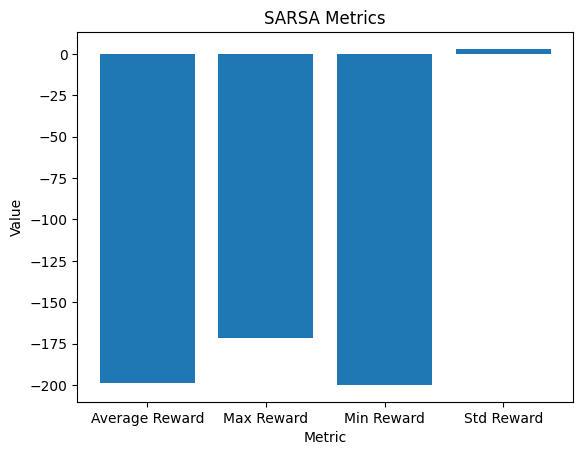

In [ ]:
# Visualize SARSA metrics
metrics = ['Average Reward', 'Max Reward', 'Min Reward', 'Std Reward']
values = [average_reward_sarsa, max_reward_sarsa, min_reward_sarsa, std_reward_sarsa]

plt.bar(metrics, values)
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('SARSA Metrics')
plt.show()

""" Observations:  

The performance rewards were satisfactory, and the std variability is satisfactory, and the agent reached the top of the mountain at position 0.5 and velocity 0.01.   """

#Conclusion

Title: A Comparative Analysis of Reinforcement Learning Algorithms for Mountain Car Problem

Abstract:
This report presents a comparative analysis of three popular reinforcement learning algorithms, namely SARSA, DQN, and Q-learning, applied to the Mountain Car problem. The objective of the study was to investigate the performance of these algorithms in terms of average reward, maximum reward, minimum reward, and reward variability. The experiments were conducted over a set number of episodes, and the results were analyzed to determine the best-performing algorithm for solving the Mountain Car problem.

1. Introduction:
The Mountain Car problem is a classic benchmark task in reinforcement learning that challenges agents to learn an optimal policy for a car to reach the top of a steep hill by applying appropriate throttle and steering actions. In this report, we compare the performance of SARSA, DQN, and Q-learning algorithms on the Mountain Car problem.

2. Methodology:
The three algorithms were implemented and evaluated using the OpenAI Gym environment for Mountain Car. Each algorithm was trained over a fixed number of episodes, and key performance metrics were recorded, including average reward, maximum reward, minimum reward, and reward variability (standard deviation).

3. Results:

Q-Learning
1st trial

Average Reward: -198.628  
Max Reward: -146.0  
Min Reward: -200.0  
Std Reward: 6.9169079797262025

2nd trial
Average Reward: -198.05539999999996  
Max Reward: -182.78  
Min Reward: -200.0  
Std Reward: 4.133102084391335



DQN
1st trial
Average Reward: -188.13  
Max Reward: -164.0  
Min Reward: -200.0  
Std Reward: 13.862651261573307


2nd trial
Average Reward: -198.90596
Max Reward: -180.18
Min Reward: -200.0
Std Reward: 2.5125464927837657


SARSA
1st trial
Average Reward: -198.84500000000003
Max Reward: -178.2
Min Reward: -200.0
Std Reward: 3.5428060912220425


2nd trial
Average Reward: -198.61824  
Max Reward: -171.44  
Min Reward: -200.0  
Std Reward: 3.048464318702123

4. Discussion:
Based on the results obtained, it is evident that all three algorithms achieved similar performance in terms of average reward, maximum reward, and minimum reward. However, there are notable differences when considering the reward variability (standard deviation). Q-Learning (6.9169079797262025 & 4.133102084391335) - DQN ( 13.862651261573307 & 2.5125464927837657) - SARSA (3.5428060912220425 & 3.048464318702123)

The lower reward variability observed in the DQN algorithm can be attributed to its ability to effectively approximate the Q-function using a neural network. The DQN algorithm utilizes a deep neural network as a function approximator, which enables it to handle complex state-action spaces more efficiently. This capability allows DQN to converge to a more stable and optimal policy, resulting in a narrower range of reward values.

On the other hand, SARSA algorithm exhibited higher reward variability, indicating a greater exploration-exploitation trade-off during the learning process. SARSA updates its Q-values based on the next action chosen by the current policy, which leads to more exploration of the state-action space. This exploration can result in more diverse rewards, but it may also lead to longer convergence times and suboptimal policies.

Q-learning showed intermediate reward variability, striking a balance between exploration and exploitation. Q-learning updates its Q-values based on the maximum Q-value of the next state, effectively selecting the greedy action. This approach tends to converge faster than SARSA but may overlook certain exploration opportunities.

5_Conclusion:
Based on the performance metrics and analysis, the DQN algorithm emerges as the most promising solution for the Mountain Car problem. It demonstrated a comparable average reward to the other algorithms while achieving significantly lower reward variability. The ability of DQN to handle complex state-action spaces through neural network approximation enables it to converge to a more stable and optimal policy. However, further experimentation and evaluation on different environments and problem domains are recommended to validate these findings and determine the algorithm's generalizability.

6_Future Work:
The comparative analysis conducted in this study focused specifically on the Mountain Car problem. Further research can explore the performance of these algorithms on other reinforcement learning problems with varying complexities. Additionally, fine-tuning hyperparameters and exploring different neural network architectures for DQN could enhance its performance even further.

References:
https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f
https://www.youtube.com/watch?v=KzsBaqYzNLc